In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats


In [45]:
delitosdf = pd.read_csv(r"C:\Users\Adam\Downloads\DelitosTipo1-2010-2020_deltas_mensuales(interpolado).csv")
df = delitosdf.drop(columns=['Unnamed: 0'])
df["Year"] = pd.DatetimeIndex(df["Date"]).year
df["Month"] = pd.DatetimeIndex(df["Date"]).month
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m")
df.insert(0, "Date", df.pop("Date"))
df

,Date,Distrito,Tipo I,Ases.,Viol.,Robo,Agr. Grave,Esc.,Apr. I,H. Auto,Year,Month
0,2010-01-01,Adjuntas,34.0,0.0,0.0,4.0,1.0,12.0,16.0,1.0,2010,1
1,2010-01-01,Ponce,243.0,4.0,0.0,26.0,14.0,52.0,123.0,24.0,2010,1
2,2010-01-01,Peñuelas,12.0,0.0,0.0,2.0,0.0,6.0,2.0,2.0,2010,1
3,2010-01-01,Patillas,13.0,0.0,0.0,0.0,4.0,6.0,3.0,0.0,2010,1
4,2010-01-01,Orocovis,22.0,0.0,0.0,0.0,0.0,10.0,12.0,0.0,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10291,2020-12-01,Orocovis,11.0,0.0,0.0,0.0,2.0,5.0,3.0,1.0,2020,12
10292,2020-12-01,Patillas,8.0,0.0,0.0,0.0,6.0,1.0,1.0,0.0,2020,12
10293,2020-12-01,Ponce,71.0,0.0,1.0,6.0,10.0,13.0,40.0,1.0,2020,12
10294,2020-12-01,Mayagüez,34.0,2.0,0.0,1.0,6.0,6.0,18.0,1.0,2020,12


In [46]:
dateog = df.loc[df['Month'].isin([12])]
dateog

,Date,Distrito,Tipo I,Ases.,Viol.,Robo,Agr. Grave,Esc.,Apr. I,H. Auto,Year,Month
858,2010-12-01,Aguada,25.0,0.0,0.0,0.0,2.0,11.0,11.0,1.0,2010,12
859,2010-12-01,Aguas Buenas,18.0,2.0,0.0,6.0,3.0,3.0,3.0,1.0,2010,12
860,2010-12-01,Ponce,305.0,6.0,0.0,27.0,17.0,66.0,173.0,16.0,2010,12
861,2010-12-01,Peñuelas,27.0,0.0,0.0,4.0,4.0,6.0,13.0,0.0,2010,12
862,2010-12-01,Patillas,11.0,0.0,0.0,1.0,0.0,4.0,5.0,1.0,2010,12
...,...,...,...,...,...,...,...,...,...,...,...,...
10291,2020-12-01,Orocovis,11.0,0.0,0.0,0.0,2.0,5.0,3.0,1.0,2020,12
10292,2020-12-01,Patillas,8.0,0.0,0.0,0.0,6.0,1.0,1.0,0.0,2020,12
10293,2020-12-01,Ponce,71.0,0.0,1.0,6.0,10.0,13.0,40.0,1.0,2020,12
10294,2020-12-01,Mayagüez,34.0,2.0,0.0,1.0,6.0,6.0,18.0,1.0,2020,12


In [47]:
date = dateog.loc[:,['Date', 'Distrito', 'Tipo I']]
date.reset_index(drop=True, inplace=True)  
date

,Date,Distrito,Tipo I
0,2010-12-01,Aguada,25.0
1,2010-12-01,Aguas Buenas,18.0
2,2010-12-01,Ponce,305.0
3,2010-12-01,Peñuelas,27.0
4,2010-12-01,Patillas,11.0
...,...,...,...
853,2020-12-01,Orocovis,11.0
854,2020-12-01,Patillas,8.0
855,2020-12-01,Ponce,71.0
856,2020-12-01,Mayagüez,34.0


In [44]:
date2020 = df.loc[df['Year'].isin([2020])]
date2020

,Date,Distrito,Tipo I,Ases.,Viol.,Robo,Agr. Grave,Esc.,Apr. I,H. Auto,Year,Month
9360,2020-01-01,Adjuntas,3.0,0.0,0.0,0.0,1.5,0.5,1.0,0.0,2020,1
9361,2020-01-01,Peñuelas,4.0,1.0,0.0,0.5,0.5,0.5,1.5,0.0,2020,1
9362,2020-01-01,Patillas,8.5,0.5,0.0,0.5,2.0,2.0,3.5,0.0,2020,1
9363,2020-01-01,Orocovis,10.5,0.0,0.0,0.5,1.0,2.0,4.5,2.5,2020,1
9364,2020-01-01,Naranjito,35.0,0.0,0.5,4.0,5.5,4.5,15.0,5.5,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10291,2020-12-01,Orocovis,11.0,0.0,0.0,0.0,2.0,5.0,3.0,1.0,2020,12
10292,2020-12-01,Patillas,8.0,0.0,0.0,0.0,6.0,1.0,1.0,0.0,2020,12
10293,2020-12-01,Ponce,71.0,0.0,1.0,6.0,10.0,13.0,40.0,1.0,2020,12
10294,2020-12-01,Mayagüez,34.0,2.0,0.0,1.0,6.0,6.0,18.0,1.0,2020,12


<ipython-input-20-0f4fef6eb776>:19: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 



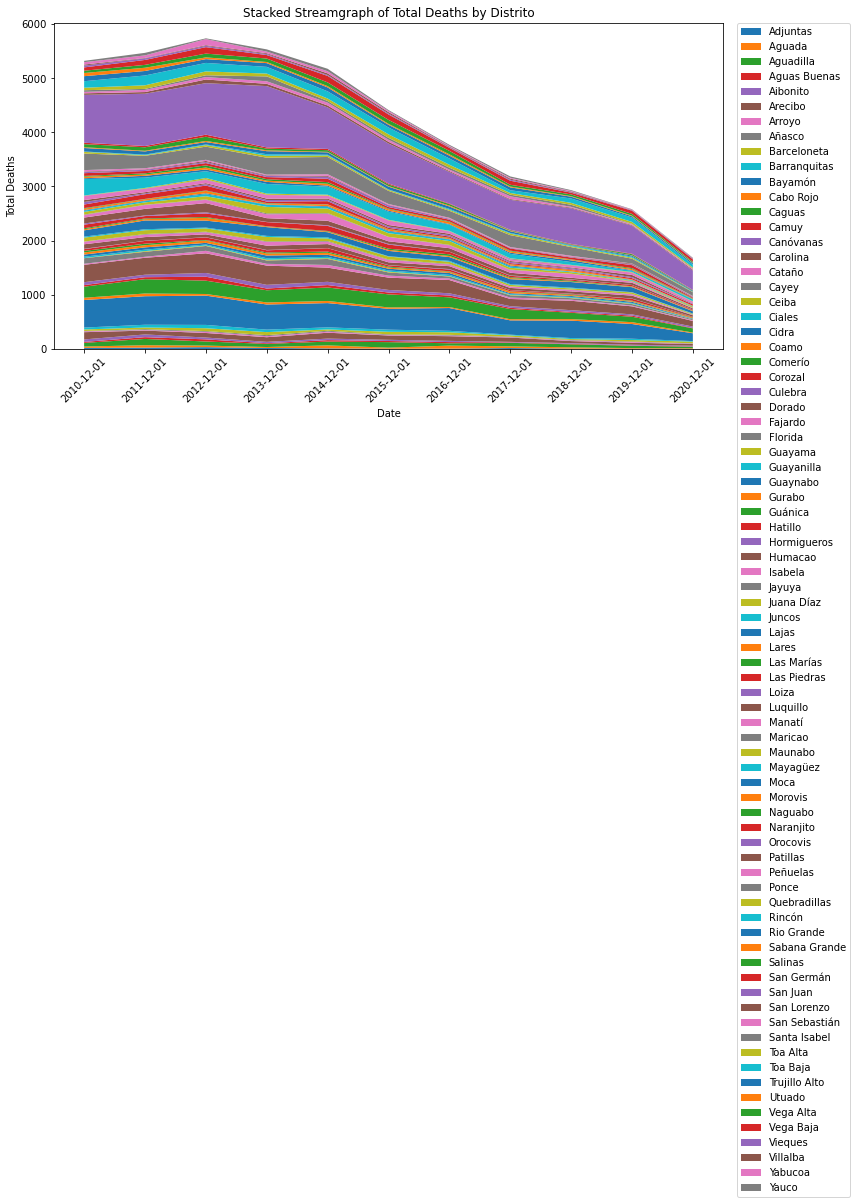

In [20]:
grouped_data = date.groupby(['Date', 'Distrito'])['Tipo I'].sum().unstack()

# Transpose the grouped data for stacked streamgraph
stacked_data = grouped_data.T.values

# Get the dates for x-axis
dates = grouped_data.index

# Plot the stacked streamgraph
plt.figure(figsize=(12, 6))
plt.stackplot(dates, stacked_data, baseline='zero', labels=grouped_data.columns)

plt.title('Stacked Streamgraph of Total Deaths by Distrito')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()

In [51]:

# Group the data by 'Date' and 'Distrito' and calculate the sum of 'Tipo I' (total deaths)
grouped_data = date.groupby(['Date', 'Distrito'])['Tipo I'].sum().reset_index()

#stacked streamgraph
fig = px.area(grouped_data, x='Date', y='Tipo I', color='Distrito',
              title='Total de Delitos Tipo I por Municipio 2010-2020',
              labels={'Date': 'Fecha', 'Tipo I': 'Total de Delitos', 'Distrito': 'Municipio'}, ##labels
              hover_data={'Date': True, 'Distrito': True, 'Tipo I': True}, ##la data en el cuadrito
              line_group='Distrito')

fig.update_layout(xaxis={'type': 'category'})

fig.show()


In [52]:
grouped_data2020 = date2020.groupby(['Date', 'Distrito'])['Tipo I'].sum().reset_index()

#stacked streamgraph
fig = px.area(grouped_data2020, x='Date', y='Tipo I', color='Distrito',
              title='Total de Delitos Tipo I por Municipio 2020',
              labels={'Date': 'Fecha', 'Tipo I': 'Total de Delitos', 'Distrito': 'Municipio'}, ##labels
              hover_data={'Date': True, 'Distrito': True, 'Tipo I': True}, ##la data en el cuadrito
              line_group='Distrito')

fig.update_layout(xaxis={'type': 'category'})

fig.show()
